In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib as plot
import seaborn as sns
import matplotlib.font_manager as fm
%matplotlib inline

### 최근 5개월 리뷰수 시각화

In [20]:
df = pd.read_csv('D:/pythonTest/DataShipJo/chicken_train_최종.csv', names=['가게명','총평점','주소','아이디','평점','date','review'])
df.head()

,가게명,총평점,주소,아이디,평점,date,review
0,BHC-시립대점,4.8,서울특별시 동대문구 전농동 295-9 성진빌딩 295-9 동광교회 1층,de**님,1,2시간 전,잘 먹었습니다
1,BHC-시립대점,4.8,서울특별시 동대문구 전농동 295-9 성진빌딩 295-9 동광교회 1층,pr**님,5,4시간 전,양이 많이 줄어든 느낌 이네요.
2,BHC-시립대점,4.8,서울특별시 동대문구 전농동 295-9 성진빌딩 295-9 동광교회 1층,sk**님,5,8시간 전,오늘도 맛나게 잘 먹었습니다~~~
3,BHC-시립대점,4.8,서울특별시 동대문구 전농동 295-9 성진빌딩 295-9 동광교회 1층,gh**님,5,10시간 전,맛있어요 양도 많아요
4,BHC-시립대점,4.8,서울특별시 동대문구 전농동 295-9 성진빌딩 295-9 동광교회 1층,ki**님,5,17시간 전,맛있게 잘먹었어요 다음에 또주문할께요


In [21]:
df.drop(df[['가게명','총평점','주소','아이디','평점']], axis=1, inplace=True)

In [22]:
df.isna().sum()

date      0
review    0
dtype: int64

In [23]:
# df.dropna(inplace=True)

In [24]:
# df.isna().sum()

In [30]:
df.sample(5)

,date,review
58073,2020년 07월 05일,맥주 안주로 딱이에여ㅜㅜ 바삭바삭????
41229,2019년 08월 02일,굳 !!!!!!!!
6579,2020년 02월 22일,여기는 진심 닭가슴살까지 맛집이다. 그냥 최고. 그것도 네이버웹툰 쿠키 120개 받...
15025,2021년 12월 31일,맛있네요 다음에 또 시킬께요
18943,2021년 06월 24일,맛잇어요 굿굿굿굿굿


In [31]:
# 2000-01-01 같이 변환을 위함 :: '년,월' 제거 후 '-' 삽입
df["date"] = df["date"].str.replace(pat=r'[년월]', repl=r'-', regex=True)

In [32]:
# 2000-01-01 같이 변환을 위함 :: '일', 공백 제거
df["date"] = df["date"].str.replace(pat=r'[일 ]', repl=r'', regex=True)

In [35]:
df.sample(5)

,date,review
24548,2021-01-28,날씨가 좋지 않아서ㅇ걱정마니햇는데 배송도 빨랏고 치킨도 맛잇네여
71459,2022-04-13,저희아이들이 기본치킨 시킬땐 여기만 찾아요♡ 학교친구들도 또래오래 양념은 인기라네요...
49578,2021-01-04,양도 푸짐하고 맛있어요
58530,2020-05-21,맛초킹 너무 맛있게 잘먹었어요 조금 짰지만 그래도 맛있어요~
68239,2019-06-17,실패할 수가 없음~


In [13]:
# 최근 5개월 리뷰수 lately_y 값에 저장하기

lately_12 = len(df[df['date'].str.contains('2021-12')])
lately_1 = len(df[df['date'].str.contains('2022-01')])
lately_2 = len(df[df['date'].str.contains('2022-02')])
lately_3 = len(df[df['date'].str.contains('2022-03')])
lately_4 = len(df[df['date'].str.contains('2022-04')])

lately_y = [lately_4, lately_3, lately_2, lately_1, lately_12]
lately_y

[1794, 3123, 3075, 2862, 2952]

In [14]:
# 최근 5개월 lately_x 값에 저장
lately_x = ['2021-12','2022-01','2022-02','2022-03','2022-04']
lately_x

['2021-12', '2022-01', '2022-02', '2022-03', '2022-04']

C:\Users\USER\AppData\Local\Temp\ipykernel_16124\2663398981.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-co" (-> color='c'). The keyword argument will take precedence.
  ax1_.plot(lately_x,lately_y, '-co', color='orange', markersize=6, linewidth=5, alpha=0.6, label='Review')


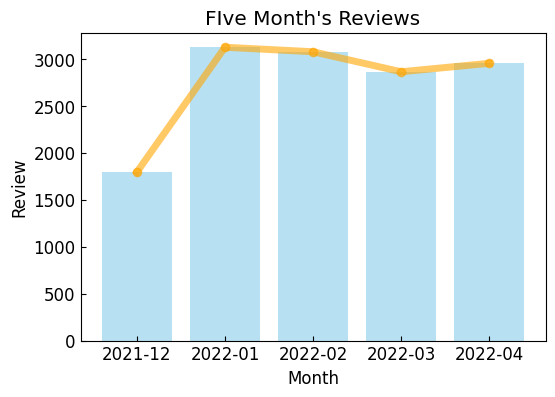

In [42]:
# 최근 5개월 리뷰수 시각화

plt.style.use('default')
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['font.size'] = 12

fig, ax1_ = plt.subplots()

ax1_.plot(lately_x,lately_y, '-co', color='orange', markersize=6, linewidth=5, alpha=0.6, label='Review')
#ax1.set_ylim(0,18)
ax1_.set_xlabel('Month')
ax1_.set_ylabel('Review')
ax1_.tick_params(axis='both', direction='in')


#ax2_ = ax1_.twinx()
ax1_.bar(lately_x,lately_y, color='skyblue', alpha=0.6, label='Review')
ax1_.tick_params(axis='y', direction='in')

# 그래프 순서 정하기 :: 막대 그래프 뒤로 배치
ax1_.set_zorder(ax1_.get_zorder()+10)
ax1_.patch.set_visible(False)

plt.title("FIve Month's Reviews")
plt.show()

## 연도별 리뷰수 시각화

In [16]:
# 2015~2022년도 리뷰수 year_y 값에 저장
year_15 = len(df[df['date'].str.contains('2015')])
year_16 = len(df[df['date'].str.contains('2016')])
year_17 = len(df[df['date'].str.contains('2017')])
year_18 = len(df[df['date'].str.contains('2018')])
year_19 = len(df[df['date'].str.contains('2019')])
year_20 = len(df[df['date'].str.contains('2020')])
year_21 = len(df[df['date'].str.contains('2021')])
year_22 = len(df[df['date'].str.contains('2022')])

year_y = [year_15, year_16, year_17, year_18, year_19, year_20, year_21, year_22]
year_y

[0, 0, 2398, 10871, 21101, 24690, 28908, 10854]

In [17]:
# 2015~2022년도 year_x 값에 저장
year_x = ['2015','2016','2017','2018','2019','2020','2021','2022']
year_x

['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

C:\Users\USER\AppData\Local\Temp\ipykernel_16124\619188301.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-co" (-> color='c'). The keyword argument will take precedence.
  ax2_.plot(year_x,year_y, '-co', color='orange', markersize=6, linewidth=5, alpha=0.6, label='Review')


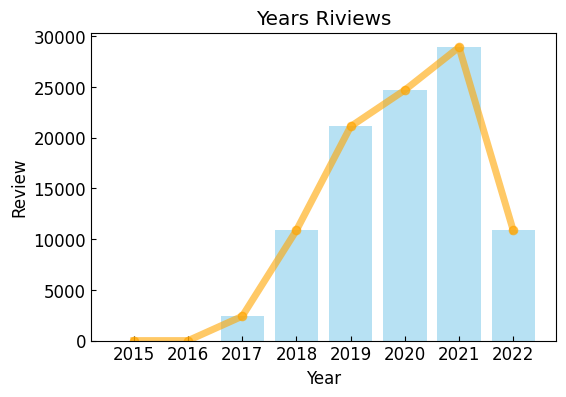

In [18]:
# 최근 5개월 리뷰수 시각화

plt.style.use('default')
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['font.size'] = 12

fig, ax2_ = plt.subplots()

ax2_.plot(year_x,year_y, '-co', color='orange', markersize=6, linewidth=5, alpha=0.6, label='Review')
#ax1.set_ylim(0,18)
ax2_.set_xlabel('Year')
ax2_.set_ylabel('Review')
ax2_.tick_params(axis='both', direction='in')


#ax2_ = ax1_.twinx()
ax2_.bar(year_x,year_y, color='skyblue', alpha=0.6, label='Review')
ax2_.tick_params(axis='y', direction='in')

# 그래프 순서 정하기 :: 막대 그래프 뒤로 배치
ax2_.set_zorder(ax2_.get_zorder()+10)
ax2_.patch.set_visible(False)

plt.title("Years Riviews")
plt.show()

In [19]:
df = pd.read_csv('D:/pythonTest/DataShipJo/chicken_train_최종.csv', names=['num','store','총평점','주소','아이디','평점','date','리뷰'])

In [78]:
# dateType으로 변환을 위함2 :: '년,월' 제거 후 '-' 삽입
df["date"] = df["date"].str.replace(pat=r'[년월]', repl=r'-', regex=True)

In [79]:
# dateType으로 변환을 위함1 :: '일', 공백 제거
df["date"] = df["date"].str.replace(pat=r'[일 ]', repl=r'', regex=True)

In [80]:
df = df[df['date'].str.contains('-')]

In [81]:
df.head()

,num,store,총평점,주소,아이디,평점,date,리뷰
39,39,BHC-시립대점,4.8,서울특별시 동대문구 전농동 295-9 성진빌딩 295-9 동광교회 1층,ch**님,5,2022-04-13,튀김옷 바삭바삭 맛있어요
40,40,BHC-시립대점,4.8,서울특별시 동대문구 전농동 295-9 성진빌딩 295-9 동광교회 1층,gk**님,5,2022-04-13,배달 빠르구 맛있어용~!
41,41,BHC-시립대점,4.8,서울특별시 동대문구 전농동 295-9 성진빌딩 295-9 동광교회 1층,gn**님,5,2022-04-13,맛있게 잘 먹었습니다
42,42,BHC-시립대점,4.8,서울특별시 동대문구 전농동 295-9 성진빌딩 295-9 동광교회 1층,gf**님,5,2022-04-13,맛있게 잘 먹었습니다
43,43,BHC-시립대점,4.8,서울특별시 동대문구 전농동 295-9 성진빌딩 295-9 동광교회 1층,me**님,5,2022-04-13,날씬한 다리가 아숩지만 맛있어요


In [82]:
df = df[['num','store','date','리뷰']]
df

,num,store,date,리뷰
39,39,BHC-시립대점,2022-04-13,튀김옷 바삭바삭 맛있어요
40,40,BHC-시립대점,2022-04-13,배달 빠르구 맛있어용~!
41,41,BHC-시립대점,2022-04-13,맛있게 잘 먹었습니다
42,42,BHC-시립대점,2022-04-13,맛있게 잘 먹었습니다
43,43,BHC-시립대점,2022-04-13,날씬한 다리가 아숩지만 맛있어요
...,...,...,...,...
99489,99489,후라이드참잘하는집-화곡점,2022-02-15,순삭.....ㅎㅎ 죄송합니다 넘 후딱 먹어서 사진 찍을 여유가...^^ 정말 맛있게...
99490,99490,후라이드참잘하는집-화곡점,2022-02-15,사진을 깜빡하고 먹었어요ㅠㅜ 맛은 맛있습니당
99491,99491,후라이드참잘하는집-화곡점,2022-02-15,맛도짱 서비스도 짱짱 또 시켜먹을게요~ 이벤트 많이 해주세요
99492,99492,후라이드참잘하는집-화곡점,2022-02-14,배달도 예정보다 빠르게오고 항상 맛있습니다!!


In [108]:
### bhc-시립대
a = df[df['store'].str.contains('시립대')]
a2022 = len(a[a['date'].str.contains('2022')])
a2021 = len(a[a['date'].str.contains('2021')])
a2020 = len(a[a['date'].str.contains('2020')])
a2019 = len(a[a['date'].str.contains('2019')])
a2018 = len(a[a['date'].str.contains('2018')])

a4 = len(a[a['date'].str.contains('2022.04')])
a3 = len(a[a['date'].str.contains('2022.03')])
a2 = len(a[a['date'].str.contains('2022.02')])
a1 = len(a[a['date'].str.contains('2022.01')])
a12 = len(a[a['date'].str.contains('2021.12')])
                                  
###  bhc-종로성대                                                
b = df[df['store'].str.contains('종로성대')]
b2022 = len(b[b['date'].str.contains('2022')])
b2021 = len(b[b['date'].str.contains('2021')])
b2020 = len(b[b['date'].str.contains('2020')])
b2019 = len(b[b['date'].str.contains('2019')])
b2018 = len(b[b['date'].str.contains('2018')])

b4 = len(b[b['date'].str.contains('2022.04')])
b3 = len(b[b['date'].str.contains('2022.03')])
b2 = len(b[b['date'].str.contains('2022.02')])
b1 = len(b[b['date'].str.contains('2022.01')])
b12 = len(b[b['date'].str.contains('2021.12')])

### KFC-청계천점
c = df[df['store'].str.contains('KFC-청계천')]
c2022 = len(c[c['date'].str.contains('2022')])
c2021 = len(c[c['date'].str.contains('2021')])
c2020 = len(c[c['date'].str.contains('2020')])
c2019 = len(c[c['date'].str.contains('2019')])
c2018 = len(c[c['date'].str.contains('2018')])

c4 = len(c[c['date'].str.contains('2022.04')])
c3 = len(c[c['date'].str.contains('2022.03')])
c2 = len(c[c['date'].str.contains('2022.02')])
c1 = len(c[c['date'].str.contains('2022.01')])
c12 = len(c[c['date'].str.contains('2021.12')])

### 교촌치킨-안국점
d = df[df['store'].str.contains('교촌치킨-안국')]
d2022 = len(d[d['date'].str.contains('2022')])
d2021 = len(d[d['date'].str.contains('2021')])
d2020 = len(d[d['date'].str.contains('2020')])
d2019 = len(d[d['date'].str.contains('2019')])
d2018 = len(d[d['date'].str.contains('2018')])

d4 = len(d[d['date'].str.contains('2022.04')])
d3 = len(d[d['date'].str.contains('2022.03')])
d2 = len(d[d['date'].str.contains('2022.02')])
d1 = len(d[d['date'].str.contains('2022.01')])
d12 = len(d[d['date'].str.contains('2021.12')])

### 네네치킨-광화문점
e = df[df['store'].str.contains('네네치킨-광화문')]
e2022 = len(e[e['date'].str.contains('2022')])
e2021 = len(e[e['date'].str.contains('2021')])
e2020 = len(e[e['date'].str.contains('2020')])
e2019 = len(e[e['date'].str.contains('2019')])
e2018 = len(e[e['date'].str.contains('2018')])

e4 = len(e[e['date'].str.contains('2022.04')])
e3 = len(e[e['date'].str.contains('2022.03')])
e2 = len(e[e['date'].str.contains('2022.02')])
e1 = len(e[e['date'].str.contains('2022.01')])
e12 = len(e[e['date'].str.contains('2021.12')])

### 네네치킨-종로점
f = df[df['store'].str.contains('네네치킨-종로')]
f2022 = len(f[f['date'].str.contains('2022')])
f2021 = len(f[f['date'].str.contains('2021')])
f2020 = len(f[f['date'].str.contains('2020')])
f2019 = len(f[f['date'].str.contains('2019')])
f2018 = len(f[f['date'].str.contains('2018')])

f4 = len(f[f['date'].str.contains('2022.04')])
f3 = len(f[f['date'].str.contains('2022.03')])
f2 = len(f[f['date'].str.contains('2022.02')])
f1 = len(f[f['date'].str.contains('2022.01')])
f12 = len(f[f['date'].str.contains('2021.12')])

### 맘스터치-서울시청점
g = df[df['store'].str.contains('맘스터치-서울')]
g2022 = len(g[g['date'].str.contains('2022')])
g2021 = len(g[g['date'].str.contains('2021')])
g2020 = len(g[g['date'].str.contains('2020')])
g2019 = len(g[g['date'].str.contains('2019')])
g2018 = len(g[g['date'].str.contains('2018')])

g4 = len(g[g['date'].str.contains('2022.04')])
g3 = len(g[g['date'].str.contains('2022.03')])
g2 = len(g[g['date'].str.contains('2022.02')])
g1 = len(g[g['date'].str.contains('2022.01')])
g12 = len(g[g['date'].str.contains('2021.12')])

### 순살이맛있는디디치킨-독립문점
h = df[df['store'].str.contains('순살이맛있는디디치킨-독립문')]
h2022 = len(h[h['date'].str.contains('2022')])
h2021 = len(h[h['date'].str.contains('2021')])
h2020 = len(h[h['date'].str.contains('2020')])
h2019 = len(h[h['date'].str.contains('2019')])
h2018 = len(h[h['date'].str.contains('2018')])

h4 = len(h[h['date'].str.contains('2022.04')])
h3 = len(h[h['date'].str.contains('2022.03')])
h2 = len(h[h['date'].str.contains('2022.02')])
h1 = len(h[h['date'].str.contains('2022.01')])
h12 = len(h[h['date'].str.contains('2021.12')])

### 쌀통닭-북창동점
i = df[df['store'].str.contains('쌀통닭')]
i2022 = len(i[i['date'].str.contains('2022')])
i2021 = len(i[i['date'].str.contains('2021')])
i2020 = len(i[i['date'].str.contains('2020')])
i2019 = len(i[i['date'].str.contains('2019')])
i2018 = len(i[i['date'].str.contains('2018')])

i4 = len(i[i['date'].str.contains('2022.04')])
i3 = len(i[i['date'].str.contains('2022.03')])
i2 = len(i[i['date'].str.contains('2022.02')])
i1 = len(i[i['date'].str.contains('2022.01')])
i12 = len(i[i['date'].str.contains('2021.12')])

### 썬더치킨-종로점
j = df[df['store'].str.contains('썬더치킨')]
j2022 = len(j[j['date'].str.contains('2022')])
j2021 = len(j[j['date'].str.contains('2021')])
j2020 = len(j[j['date'].str.contains('2020')])
j2019 = len(j[j['date'].str.contains('2019')])
j2018 = len(j[j['date'].str.contains('2018')])

j4 = len(j[j['date'].str.contains('2022.04')])
j3 = len(j[j['date'].str.contains('2022.03')])
j2 = len(j[j['date'].str.contains('2022.02')])
j1 = len(j[j['date'].str.contains('2022.01')])
j12 = len(j[j['date'].str.contains('2021.12')])

### 자담치킨-종로점
k = df[df['store'].str.contains('자담치킨-종로')]
k2022 = len(k[k['date'].str.contains('2022')])
k2021 = len(k[k['date'].str.contains('2021')])
k2020 = len(k[k['date'].str.contains('2020')])
k2019 = len(k[k['date'].str.contains('2019')])
k2018 = len(k[k['date'].str.contains('2018')])

k4 = len(k[k['date'].str.contains('2022.04')])
k3 = len(k[k['date'].str.contains('2022.03')])
k2 = len(k[k['date'].str.contains('2022.02')])
k1 = len(k[k['date'].str.contains('2022.01')])
k12 = len(k[k['date'].str.contains('2021.12')])

### 큰집닭강정-성대점
l = df[df['store'].str.contains('큰집닭강정')]
l2022 = len(l[l['date'].str.contains('2022')])
l2021 = len(l[l['date'].str.contains('2021')])
l2020 = len(l[l['date'].str.contains('2020')])
l2019 = len(l[l['date'].str.contains('2019')])
l2018 = len(l[l['date'].str.contains('2018')])

l4 = len(l[l['date'].str.contains('2022.04')])
l3 = len(l[l['date'].str.contains('2022.03')])
l2 = len(l[l['date'].str.contains('2022.02')])
l1 = len(l[l['date'].str.contains('2022.01')])
l12 = len(l[l['date'].str.contains('2021.12')])

### 푸라닭-대학로점
m = df[df['store'].str.contains('푸라닭-대학로')]
m2022 = len(m[m['date'].str.contains('2022')])
m2021 = len(m[m['date'].str.contains('2021')])
m2020 = len(m[m['date'].str.contains('2020')])
m2019 = len(m[m['date'].str.contains('2019')])
m2018 = len(m[m['date'].str.contains('2018')])

m4 = len(m[m['date'].str.contains('2022.04')])
m3 = len(m[m['date'].str.contains('2022.03')])
m2 = len(m[m['date'].str.contains('2022.02')])
m1 = len(m[m['date'].str.contains('2022.01')])
m12 = len(m[m['date'].str.contains('2021.12')])

### 3가지맛투존치킨-노원본점
n = df[df['store'].str.contains('3가지맛')]
n2022 = len(n[n['date'].str.contains('2022')])
n2021 = len(n[n['date'].str.contains('2021')])
n2020 = len(n[n['date'].str.contains('2020')])
n2019 = len(n[n['date'].str.contains('2019')])
n2018 = len(n[n['date'].str.contains('2018')])

n4 = len(n[n['date'].str.contains('2022.04')])
n3 = len(n[n['date'].str.contains('2022.03')])
n2 = len(n[n['date'].str.contains('2022.02')])
n1 = len(n[n['date'].str.contains('2022.01')])
n12 = len(n[n['date'].str.contains('2021.12')])

### BHC-방학점
o = df[df['store'].str.contains('BHC-방학')]
o2022 = len(o[o['date'].str.contains('2022')])
o2021 = len(o[o['date'].str.contains('2021')])
o2020 = len(o[o['date'].str.contains('2020')])
o2019 = len(o[o['date'].str.contains('2019')])
o2018 = len(o[o['date'].str.contains('2018')])

o4 = len(o[o['date'].str.contains('2022.04')])
o3 = len(o[o['date'].str.contains('2022.03')])
o2 = len(o[o['date'].str.contains('2022.02')])
o1 = len(o[o['date'].str.contains('2022.01')])
o12 = len(o[o['date'].str.contains('2021.12')])

### 강정이기가막혀-역삼점
p = df[df['store'].str.contains('강정이기가')]
p2022 = len(p[p['date'].str.contains('2022')])
p2021 = len(p[p['date'].str.contains('2021')])
p2020 = len(p[p['date'].str.contains('2020')])
p2019 = len(p[p['date'].str.contains('2019')])
p2018 = len(p[p['date'].str.contains('2018')])

p4 = len(p[p['date'].str.contains('2022.04')])
p3 = len(p[p['date'].str.contains('2022.03')])
p2 = len(p[p['date'].str.contains('2022.02')])
p1 = len(p[p['date'].str.contains('2022.01')])
p12 = len(p[p['date'].str.contains('2021.12')])

### 굽네치킨&피자-역삼2동점
q = df[df['store'].str.contains('역삼2동')]
q2022 = len(q[q['date'].str.contains('2022')])
q2021= len(q[q['date'].str.contains('2021')])
q2020 = len(q[q['date'].str.contains('2020')])
q2019 = len(q[q['date'].str.contains('2019')])
q2018 = len(q[q['date'].str.contains('2018')])

q4 = len(q[q['date'].str.contains('2022.04')])
q3 = len(q[q['date'].str.contains('2022.03')])
q2 = len(q[q['date'].str.contains('2022.02')])
q1 = len(q[q['date'].str.contains('2022.01')])
q12 = len(q[q['date'].str.contains('2021.12')])

### 또래오래-동작상도점
r = df[df['store'].str.contains('동작상도')]
r2022 = len(r[r['date'].str.contains('2022')])
r2021 = len(r[r['date'].str.contains('2021')])
r2020 = len(r[r['date'].str.contains('2020')])
r2019 = len(r[r['date'].str.contains('2019')])
r2018 = len(r[r['date'].str.contains('2018')])

r4 = len(r[r['date'].str.contains('2022.04')])
r3 = len(r[r['date'].str.contains('2022.03')])
r2 = len(r[r['date'].str.contains('2022.02')])
r1 = len(r[r['date'].str.contains('2022.01')])
r12 = len(r[r['date'].str.contains('2021.12')])

### 또래오래-마포망원점
s = df[df['store'].str.contains('마포망원')]
s2022 = len(s[s['date'].str.contains('2022')])
s2021 = len(s[s['date'].str.contains('2021')])
s2020 = len(s[s['date'].str.contains('2020')])
s2019 = len(s[s['date'].str.contains('2019')])
s2018 = len(s[s['date'].str.contains('2018')])

s4 = len(s[s['date'].str.contains('2022.04')])
s3 = len(s[s['date'].str.contains('2022.03')])
s2 = len(s[s['date'].str.contains('2022.02')])
s1 = len(s[s['date'].str.contains('2022.01')])
s12 = len(s[s['date'].str.contains('2021.12')])

### 멕시카나-신월까치산점
t = df[df['store'].str.contains('신월까치')]
t2022 = len(t[t['date'].str.contains('2022')])
t2021 = len(t[t['date'].str.contains('2021')])
t2020 = len(t[t['date'].str.contains('2020')])
t2019 = len(t[t['date'].str.contains('2019')])
t2018 = len(t[t['date'].str.contains('2018')])

t4 = len(t[t['date'].str.contains('2022.04')])
t3 = len(t[t['date'].str.contains('2022.03')])
t2 = len(t[t['date'].str.contains('2022.02')])
t1 = len(t[t['date'].str.contains('2022.01')])
t12 = len(t[t['date'].str.contains('2021.12')])

### 자담치킨-응암점
u = df[df['store'].str.contains('자담치킨-응암')]
u2022 = len(u[u['date'].str.contains('2022')])
u2021 = len(u[u['date'].str.contains('2021')])
u2020 = len(u[u['date'].str.contains('2020')])
u2019 = len(u[u['date'].str.contains('2019')])
u2018 = len(u[u['date'].str.contains('2018')])

u4 = len(u[u['date'].str.contains('2022.04')])
u3 = len(u[u['date'].str.contains('2022.03')])
u2 = len(u[u['date'].str.contains('2022.02')])
u1 = len(u[u['date'].str.contains('2022.01')])
u12 = len(u[u['date'].str.contains('2021.12')])

### 치킨트리플-강서점
v = df[df['store'].str.contains('치킨트리플-강서')]
v2022 = len(v[v['date'].str.contains('2022')])
v2021 = len(v[v['date'].str.contains('2021')])
v2020 = len(v[v['date'].str.contains('2020')])
v2019 = len(v[v['date'].str.contains('2019')])
v2018 = len(v[v['date'].str.contains('2018')])

v4 = len(v[v['date'].str.contains('2022.04')])
v3 = len(v[v['date'].str.contains('2022.03')])
v2 = len(v[v['date'].str.contains('2022.02')])
v1 = len(v[v['date'].str.contains('2022.01')])
v12 = len(v[v['date'].str.contains('2021.12')])

### 치탈리아-본점
w = df[df['store'].str.contains('치탈리아')]
w2022 = len(w[w['date'].str.contains('2022')])
w2021 = len(w[w['date'].str.contains('2021')])
w2020 = len(w[w['date'].str.contains('2020')])
w2019 = len(w[w['date'].str.contains('2019')])
w2018 = len(w[w['date'].str.contains('2018')])

w4 = len(w[w['date'].str.contains('2022.04')])
w3 = len(w[w['date'].str.contains('2022.03')])
w2 = len(w[w['date'].str.contains('2022.02')])
w1 = len(w[w['date'].str.contains('2022.01')])
w12 = len(w[w['date'].str.contains('2021.12')])

### 페리카나-논현점
x = df[df['store'].str.contains('페리카나-논현')]
x2022 = len(x[x['date'].str.contains('2022')])
x2021 = len(x[x['date'].str.contains('2021')])
x2020 = len(x[x['date'].str.contains('2020')])
x2019 = len(x[x['date'].str.contains('2019')])
x2018 = len(x[x['date'].str.contains('2018')])

x4 = len(x[x['date'].str.contains('2022.04')])
x3 = len(x[x['date'].str.contains('2022.03')])
x2 = len(x[x['date'].str.contains('2022.02')])
x1 = len(x[x['date'].str.contains('2022.01')])
x12 = len(x[x['date'].str.contains('2021.12')])

### 후라이드참잘하는집-마포점
y = df[df['store'].str.contains('후라이드참잘하는집-마포')]
y2022 = len(y[y['date'].str.contains('2022')])
y2021 = len(y[y['date'].str.contains('2021')])
y2020 = len(y[y['date'].str.contains('2020')])
y2019 = len(y[y['date'].str.contains('2019')])
y2018 = len(y[y['date'].str.contains('2018')])

y4 = len(y[y['date'].str.contains('2022.04')])
y3 = len(y[y['date'].str.contains('2022.03')])
y2 = len(y[y['date'].str.contains('2022.02')])
y1 = len(y[y['date'].str.contains('2022.01')])
y12 = len(y[y['date'].str.contains('2021.12')])

### 후라이드참잘하는집-화곡점
z = df[df['store'].str.contains('후라이드참잘하는집-화곡')]
z2022 = len(z[z['date'].str.contains('2022')])
z2021 = len(z[z['date'].str.contains('2021')])
z2020 = len(z[z['date'].str.contains('2020')])
z2019 = len(z[z['date'].str.contains('2019')])
z2018 = len(z[z['date'].str.contains('2018')])

z4 = len(z[z['date'].str.contains('2022.04')])
z3 = len(z[z['date'].str.contains('2022.03')])
z2 = len(z[z['date'].str.contains('2022.02')])
z1 = len(z[z['date'].str.contains('2022.01')])
z12 = len(z[z['date'].str.contains('2021.12')])

### 노랑통닭-신림점
aa = df[df['store'].str.contains('노랑통닭-신림')]
aa2022 = len(aa[aa['date'].str.contains('2022')])
aa2021 = len(aa[aa['date'].str.contains('2021')])
aa2020 = len(aa[aa['date'].str.contains('2020')])
aa2019 = len(aa[aa['date'].str.contains('2019')])
aa2018 = len(aa[aa['date'].str.contains('2018')])

aa4 = len(aa[aa['date'].str.contains('2022.04')])
aa3 = len(aa[aa['date'].str.contains('2022.03')])
aa2 = len(aa[aa['date'].str.contains('2022.02')])
aa1 = len(aa[aa['date'].str.contains('2022.01')])
aa12 = len(aa[aa['date'].str.contains('2021.12')])

### BHC-신대방스타점
bb = df[df['store'].str.contains('BHC-신대방')]
bb2022 = len(bb[bb['date'].str.contains('2022')])
bb2021 = len(bb[bb['date'].str.contains('2021')])
bb2020 = len(bb[bb['date'].str.contains('2020')])
bb2019 = len(bb[bb['date'].str.contains('2019')])
bb2018 = len(bb[bb['date'].str.contains('2018')])

bb4 = len(bb[bb['date'].str.contains('2022.04')])
bb3 = len(bb[bb['date'].str.contains('2022.03')])
bb2 = len(bb[bb['date'].str.contains('2022.02')])
bb1 = len(bb[bb['date'].str.contains('2022.01')])
bb12 = len(bb[bb['date'].str.contains('2021.12')])

### 신화불닭-강남점
cc = df[df['store'].str.contains('신화불닭')]
cc2022 = len(cc[cc['date'].str.contains('2022')])
cc2021 = len(cc[cc['date'].str.contains('2021')])
cc2020 = len(cc[cc['date'].str.contains('2020')])
cc2019 = len(cc[cc['date'].str.contains('2019')])
cc2018 = len(cc[cc['date'].str.contains('2018')])

cc4 = len(cc[cc['date'].str.contains('2022.04')])
cc3 = len(cc[cc['date'].str.contains('2022.03')])
cc2 = len(cc[cc['date'].str.contains('2022.02')])
cc1 = len(cc[cc['date'].str.contains('2022.01')])
cc12 = len(cc[cc['date'].str.contains('2021.12')])

### KFC-왕십리역사점
dd = df[df['store'].str.contains('KFC-왕십리')]
dd2022 = len(dd[dd['date'].str.contains('2022')])
dd2021 = len(dd[dd['date'].str.contains('2021')])
dd2020 = len(dd[dd['date'].str.contains('2020')])
dd2019 = len(dd[dd['date'].str.contains('2019')])
dd2018 = len(dd[dd['date'].str.contains('2018')])

dd4 = len(dd[dd['date'].str.contains('2022.04')])
dd3 = len(dd[dd['date'].str.contains('2022.03')])
dd2 = len(dd[dd['date'].str.contains('2022.02')])
dd1 = len(dd[dd['date'].str.contains('2022.01')])
dd12 = len(dd[dd['date'].str.contains('2021.12')])

### 페리카나-서초동점
ee = df[df['store'].str.contains('페리카나-서초동')]
ee2022 = len(ee[ee['date'].str.contains('2022')])
ee2021 = len(ee[ee['date'].str.contains('2021')])
ee2020 = len(ee[ee['date'].str.contains('2020')])
ee2019 = len(ee[ee['date'].str.contains('2019')])
ee2018 = len(ee[ee['date'].str.contains('2018')])

ee4 = len(ee[ee['date'].str.contains('2022.04')])
ee3 = len(ee[ee['date'].str.contains('2022.03')])
ee2 = len(ee[ee['date'].str.contains('2022.02')])
ee1 = len(ee[ee['date'].str.contains('2022.01')])
ee12 = len(ee[ee['date'].str.contains('2021.12')])

### 코리엔탈깻잎두마리치킨-독산점
ff = df[df['store'].str.contains('코리엔탈')]
ff2022 = len(ff[ff['date'].str.contains('2022')])
ff2021 = len(ff[ff['date'].str.contains('2021')])
ff2020 = len(ff[ff['date'].str.contains('2020')])
ff2019 = len(ff[ff['date'].str.contains('2019')])
ff2018 = len(ff[ff['date'].str.contains('2018')])

ff4 = len(ff[ff['date'].str.contains('2022.04')])
ff3 = len(ff[ff['date'].str.contains('2022.03')])
ff2 = len(ff[ff['date'].str.contains('2022.02')])
ff1 = len(ff[ff['date'].str.contains('2022.01')])
ff12 = len(ff[ff['date'].str.contains('2021.12')])


In [104]:
df[df['store'].str.contains('네네치킨-종로')]

,num,store,date,리뷰
13415,13415,네네치킨-종로점,2022-04-13,따듯한 치킨 맛있게 먹었어요
13416,13416,네네치킨-종로점,2022-04-13,정말 맛있게 먹었습니다
13417,13417,네네치킨-종로점,2022-04-13,치킨은 네네치킨!!!
13418,13418,네네치킨-종로점,2022-04-12,넘 맛있습니다! 양도 짱 많고 만족스러워요!
13419,13419,네네치킨-종로점,2022-04-12,배달도 빠르고 맛도 좋아요
13420,13420,네네치킨-종로점,2022-04-12,맛있게 잘 먹었습니다
13421,13421,네네치킨-종로점,2022-04-12,요청사항 들어주셔서 감사합니다!
13422,13422,네네치킨-종로점,2022-04-12,맛집입니다
13423,13423,네네치킨-종로점,2022-04-12,언제나 푸짐하고 깔끔한 맛 정말 좋아요
13424,13424,네네치킨-종로점,2022-04-12,맛있었어여 ㅎㅎㅎㅎ


In [110]:
ck_date = pd.DataFrame({'store':['BHC-시립대점','BHC-종로성대점','BHC-종로본점','KFC-청계천점','교촌치킨-안국점','네네치킨-광화문점','네네치킨-종로점','맘스터치-서울시청점','순살이맛있는디디치킨-독립문점','쌀통닭-북창동점','썬더치킨-종로점','자담치킨-종로점','큰집닭강정-성대점','푸라닭-대학로점','3가지맛투존치킨-노원본점','BHC-방학점','강정이기가막혀-역삼점','굽네치킨&피자-역삼2동점','또래오래-동작상도점','또래오래-마포망원점','멕시카나-신월까치산점','자담치킨-응암점','치킨트리플-강서점','치탈리아-본점','페리카나-논현점','후라이드참잘하는집-마포점','후라이드참잘하는집-화곡점','노랑통닭-신림점','BHC-신대방스타점','신화불닭-강남점','KFC-왕십리역사점','페리카나-서초동점','코리엔탈깻잎두마리치킨-독산점'],
              '2018':[a2018, b2018, 0 ,c2018, d2018, e2018, f2018, g2018, h2018, i2018, j2018, k2018, l2018, m2018, n2018, o2018, p2018, q2018, r2018, s2018, t2018, u2018, v2018, w2018, x2018, y2018, z2018, aa2018, bb2018, cc2018, dd2018, ee2018, ff2018],
              '2019':[a2019, b2019, 101 ,c2019, d2019, e2019, f2019, g2019, h2019, i2019, j2019, k2019, l2019, m2019, n2019, o2019, p2019, q2019, r2019, s2019, t2019, u2019, v2019, w2019, x2019, y2019, z2019, aa2019, bb2019, cc2019, dd2019, ee2019, ff2019],
              '2020':[a2020, b2020, 247 ,c2020, d2020, e2020, f2020, g2020, h2020, i2020, j2020, k2020, l2020, m2020, n2020, o2020, p2020, q2020, r2020, s2020, t2020, u2020, v2020, w2020, x2020, y2020, z2020, aa2020, bb2020, cc2020, dd2020, ee2020, ff2020],
              '2021':[a2021, b2021, 280 ,c2021, d2021, e2021, f2021, g2021, h2021, i2021, j2021, k2021, l2021, m2021, n2021, o2021, p2021, q2021, r2021, s2021, t2021, u2021, v2021, w2021, x2021, y2021, z2021, aa2021, bb2021, cc2021, dd2021, ee2021, ff2021],
              '2022':[a2022, b2022, 139 ,c2022, d2022, e2022, f2022, g2022, h2022, i2022, j2022, k2022, l2022, m2022, n2022, o2022, p2022, q2022, r2022, s2022, t2022, u2022, v2022, w2022, x2022, y2022, z2022, aa2022, bb2022, cc2022, dd2022, ee2022, ff2022],
              '2022-04':[a4, b4, 22, c4, d4, e4, f4, g4, h4, i4, j4, k4, l4, m4, n4, o4, p4, q4, r4, s4, t4, u4, v4, w4, x4, y4, z4, aa4, bb4, cc4, dd4, ee4, ff4],
              '2022-03':[a3, b3, 48, c3, d3, e3, f3, g3, h3, i3, j3, k3, l3, m3, n3, o3, p3, q3, r3, s3, t3, u3, v3, w3, x3, y3, z3, aa3, bb3, cc3, dd3, ee3, ff3],
              '2022-02':[a2, b2, 41, c2, d2, e2, f2, g2, h2, i2, j2, k2, l2, m2, n2, o2, p2, q2, r2, s2, t2, u2, v2, w2, x2, y2, z2, aa2, bb2, cc2, dd2, ee2, ff2],
              '2022-01':[a1, b1, 28, c1, d1, e1, f1, g1, h1, i1, j1, k1, l1, m1, n1, o1, p1, q1, r1, s1, t1, u1, v1, w1, x1, y1, z1, aa1, bb1, cc1, dd1, ee1, ff1],
              '2021-12':[a12, b12, 45, c12, d12, e12, f12, g12, h12, i12, j12, k12, l12, m12, n12, o12, p12, q12, r12, s12, t12, u12, v12, w12, x12, y12, z12, aa12, bb12, cc12, dd12, ee12, ff12]             
             })
              
                           

In [111]:
ck_date.head()

,store,2018,2019,2020,2021,2022,2022-04,2022-03,2022-02,2022-01,2021-12
0,BHC-시립대점,1207,1329,2641,3073,1131,166,364,353,248,374
1,BHC-종로성대점,0,0,413,670,306,47,81,104,74,83
2,BHC-종로본점,0,101,247,280,139,22,48,41,28,45
3,KFC-청계천점,68,378,227,35,30,4,2,10,14,2
4,교촌치킨-안국점,0,0,106,185,57,10,19,9,19,15


In [112]:
#chicken_label = review_df[['아이디','리뷰','y']]
ck_date.to_csv('ck_date.csv',mode='a', header=False, encoding='utf-8-sig')